# Load Dataset

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tr = pd.read_csv("/content/drive/MyDrive/Dataset/Task Compfest/train.csv")
Ts = pd.read_csv("/content/drive/MyDrive/Dataset/Task Compfest/test.csv")

## EDA

In [118]:
Tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

In [119]:
Tr.isnull().sum()

,0
ID,0
date,0
cluster_id,0
electricity_consumption,0
temperature_2m_max,0
temperature_2m_min,0
apparent_temperature_max,0
apparent_temperature_min,0
sunshine_duration,0
daylight_duration,0


In [120]:
print(f"Total Duplikasi Data:", Tr.duplicated().sum())

Total Duplikasi Data: 0


In [121]:
Tr.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [122]:
Tr['date'].unique()

array(['2014-01-01', '2014-01-02', '2014-01-03', ..., '2021-12-29',
       '2021-12-30', '2021-12-31'], dtype=object)

In [123]:
# Turning Timestamp Row into datetime type
Tr['date'] = pd.to_datetime(Tr["date"])

# Buat fitur waktu tambahan
Tr['DayOfWeek'] = Tr['date'].dt.dayofweek
Tr['Month'] = Tr['date'].dt.month
Tr['Year'] = Tr['date'].dt.year

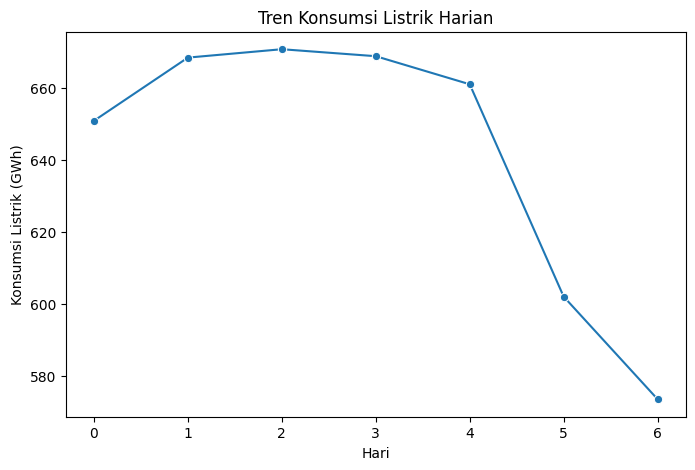

In [124]:
# Plot konsumsi rata-rata per hari dalam seminggu
plt.figure(figsize=(8, 5))
sns.lineplot(data=Tr, x='DayOfWeek', y='electricity_consumption', estimator='mean', errorbar=None, marker='o')
plt.title("Tren Konsumsi Listrik Harian")
plt.xlabel("Hari")
plt.ylabel("Konsumsi Listrik (GWh)")
plt.show()

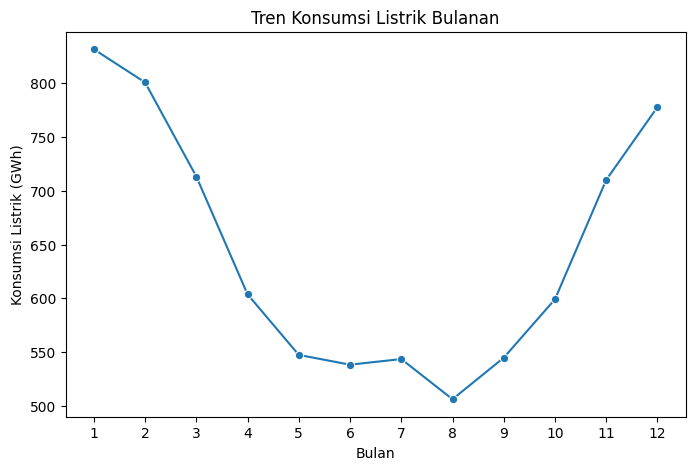

In [125]:
# Plot konsumsi rata-rata per bulan
plt.figure(figsize=(8, 5))
sns.lineplot(data=Tr, x='Month', y='electricity_consumption', estimator='mean', errorbar=None, marker='o')
plt.xticks(ticks=range(1, 13))
plt.title("Tren Konsumsi Listrik Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Konsumsi Listrik (GWh)")
plt.show()

In [126]:
Tr['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

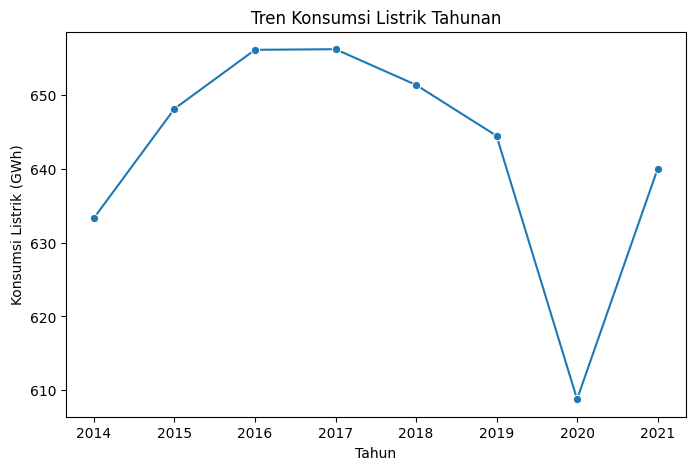

In [127]:
# Konsumsi rata-rata per tahun
plt.figure(figsize=(8, 5))
sns.lineplot(data=Tr, x='Year', y='electricity_consumption', estimator='mean', errorbar=None, marker='o')
plt.title("Tren Konsumsi Listrik Tahunan")
plt.xlabel("Tahun")
plt.ylabel("Konsumsi Listrik (GWh)")
plt.show()

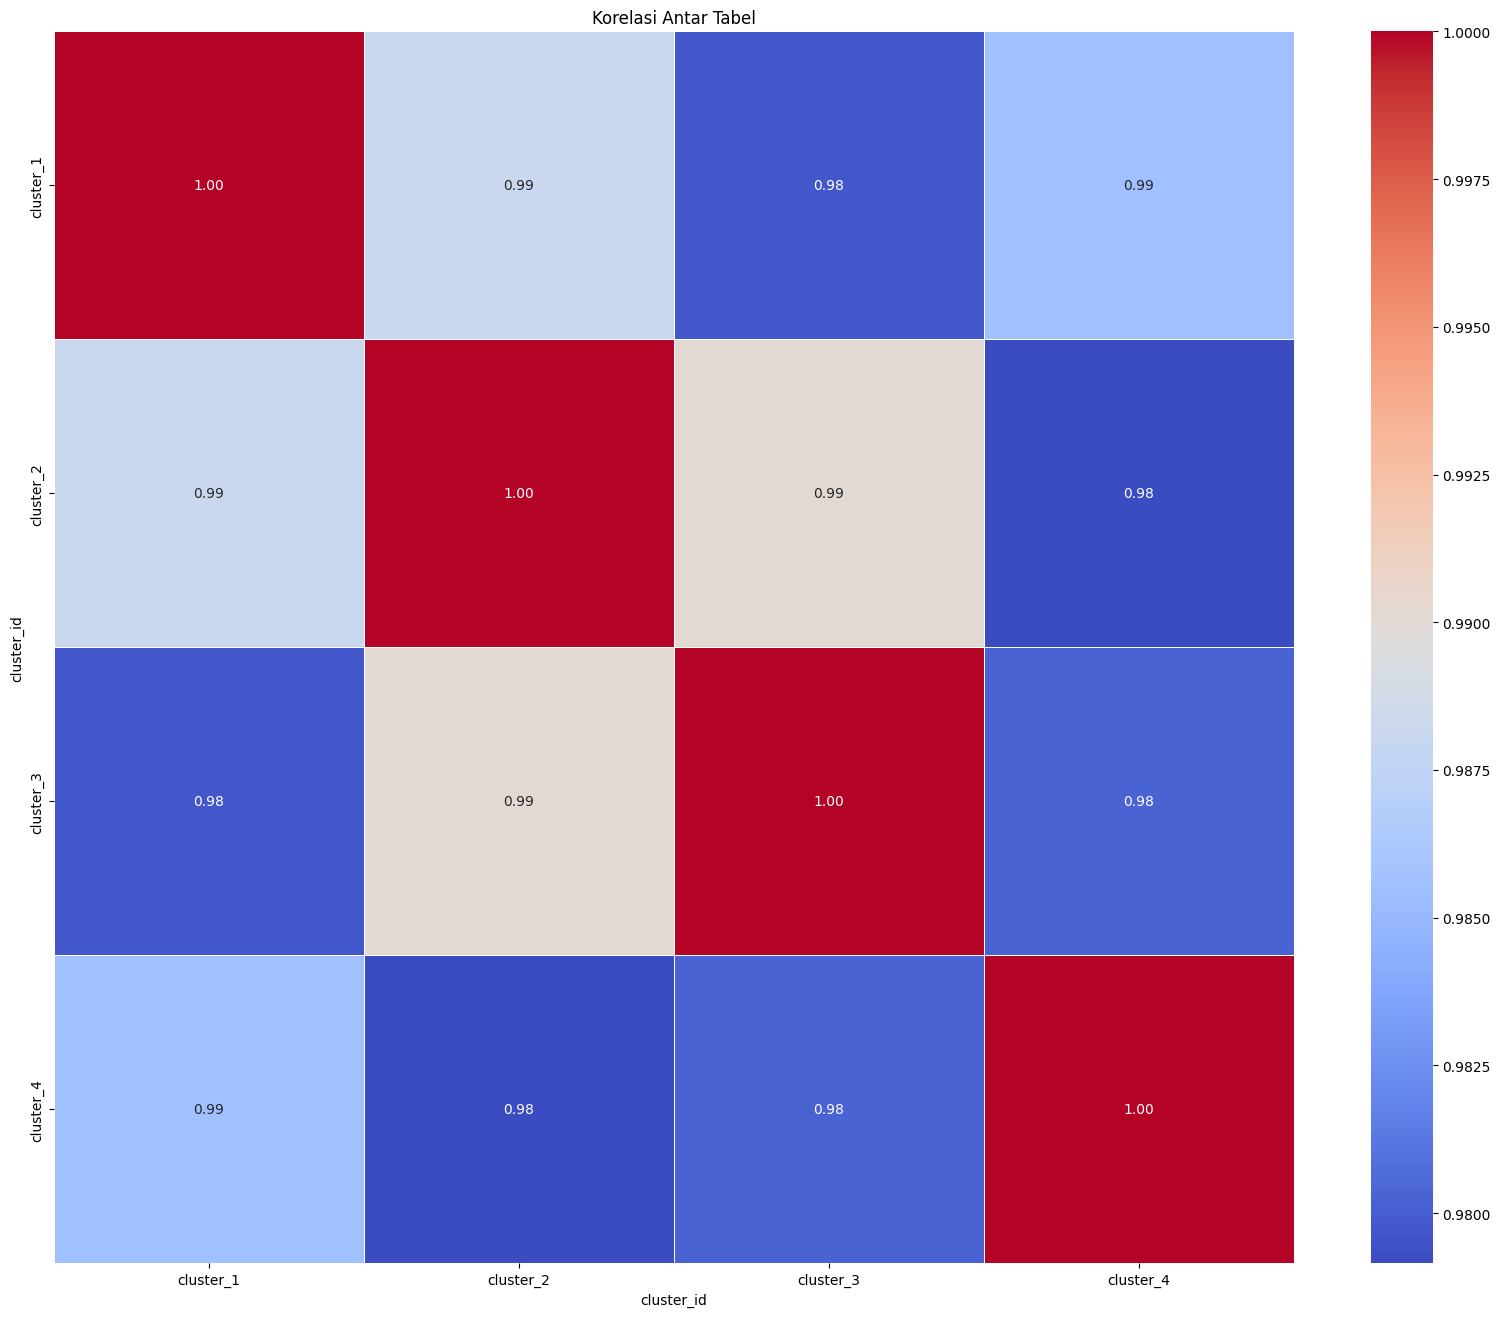

In [128]:
# Hitung rata-rata konsumsi listrik tiap cluster
cluster_avg = Tr.groupby("cluster_id")["electricity_consumption"].mean().sort_values()

# Hitung rasio konsumsi antar cluster (dibanding cluster terendah)
baseline = cluster_avg.min()
cluster_ratio = cluster_avg / baseline

# Gabungkan hasil ke dalam satu DataFrame
cluster_analysis = pd.DataFrame({
    "Rata-rata Konsumsi (GWh)": cluster_avg,
    "Rasio terhadap cluster terendah": cluster_ratio
})

# Tambahan: Cek korelasi antar cluster berdasarkan konsumsi per hari
pivot_df = Tr.pivot(index='date', columns='cluster_id', values='electricity_consumption')
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Tabel")
plt.show()

In [129]:
# Hitung rata-rata konsumsi listrik tiap cluster
avg_cluster = Tr.groupby('cluster_id')['electricity_consumption'].mean().sort_values(ascending=False)

# Tampilkan rasio terhadap cluster tertinggi
ratio = avg_cluster / avg_cluster.max()

print("Rata-rata konsumsi per cluster:\n", avg_cluster)
print("\nRasio dibanding konsumsi tertinggi:\n", ratio)

Rata-rata konsumsi per cluster:
 cluster_id
cluster_4    1018.389092
cluster_3     706.762751
cluster_2     503.367172
cluster_1     340.734297
Name: electricity_consumption, dtype: float64

Rasio dibanding konsumsi tertinggi:
 cluster_id
cluster_4    1.000000
cluster_3    0.694001
cluster_2    0.494278
cluster_1    0.334582
Name: electricity_consumption, dtype: float64


In [130]:
# Hitung threshold
temp25 = Tr['temperature_2m_min'].quantile(0.25)
sun_mean = Tr['sunshine_duration'].mean()

# Filter data sesuai kondisi
filtered_df = Tr[
    (Tr['temperature_2m_min'] < temp25) &
    (Tr['sunshine_duration'] < sun_mean)
]

# Hitung rata-rata konsumsi listrik per cluster dalam kondisi tersebut
avg_by_cluster = filtered_df.groupby('cluster_id')['electricity_consumption'].mean().sort_values()

print("Persentil ke-25 suhu minimum:", temp25)
print("Rata-rata durasi sinar matahari:", sun_mean)
print("\nRata-rata konsumsi listrik saat suhu rendah dan sinar matahari kurang:")
print(avg_by_cluster)


Persentil ke-25 suhu minimum: 2.5
Rata-rata durasi sinar matahari: 29302.656240588636

Rata-rata konsumsi listrik saat suhu rendah dan sinar matahari kurang:
cluster_id
cluster_1     446.717842
cluster_2     656.699589
cluster_3     887.137849
cluster_4    1290.826150
Name: electricity_consumption, dtype: float64


## Feature Selection

/tmp/ipython-input-131-854792750.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


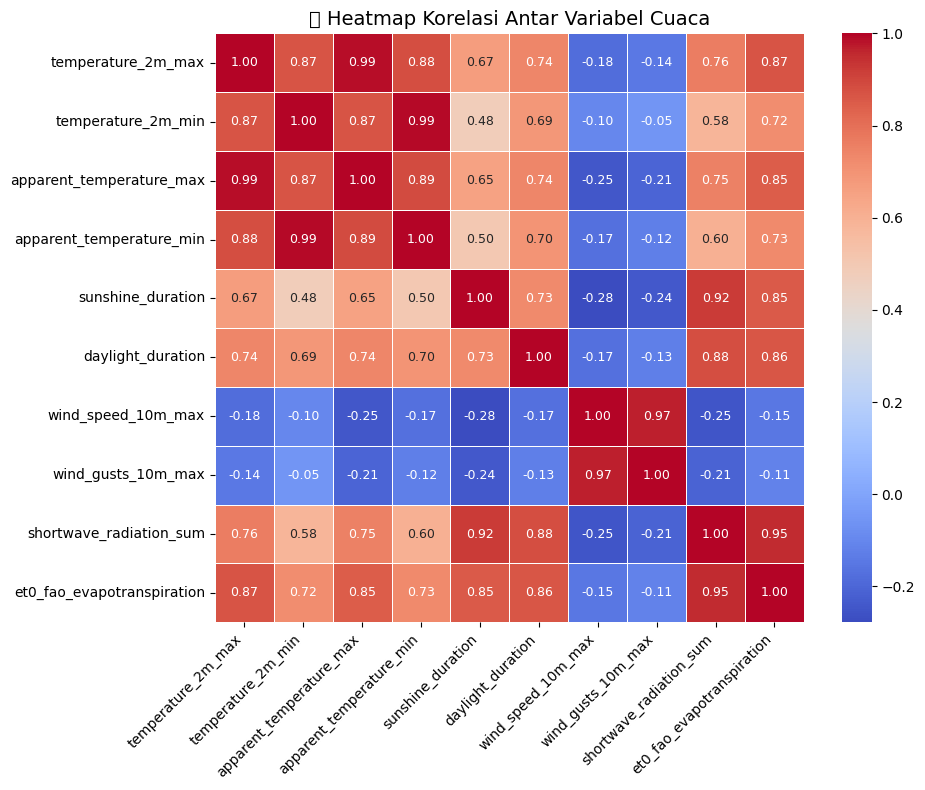

,Feature,VIF
0,const,169.711500
4,apparent_temperature_min,77.760424
1,temperature_2m_max,71.571550
2,temperature_2m_min,71.107872
3,apparent_temperature_max,65.472843
9,shortwave_radiation_sum,56.617421
10,et0_fao_evapotranspiration,33.420514
7,wind_speed_10m_max,15.814852
8,wind_gusts_10m_max,15.309440
5,sunshine_duration,9.978717


In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Pilih fitur numerik cuaca
weather_features = [
    'temperature_2m_max', 'temperature_2m_min',
    'apparent_temperature_max', 'apparent_temperature_min',
    'sunshine_duration', 'daylight_duration',
    'wind_speed_10m_max', 'wind_gusts_10m_max',
    'shortwave_radiation_sum', 'et0_fao_evapotranspiration'
]

# Hitung korelasi
corr_matrix = Tr[weather_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 9}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("📊 Heatmap Korelasi Antar Variabel Cuaca", fontsize=14)
plt.tight_layout()
plt.show()


# VIF
X = add_constant(Tr[weather_features])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)


In [132]:
# Encoding
# Buat peta label berdasarkan rata-rata konsumsi
cluster_order = Tr.groupby('cluster_id')['electricity_consumption'].mean().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_order)}

# Terapkan mapping ke train dan test
Tr['cluster_encoded'] = Tr['cluster_id'].map(cluster_mapping)
Ts['cluster_encoded'] = Ts['cluster_id'].map(cluster_mapping)

In [133]:
print("Mapping cluster_id ke angka:")
print(cluster_mapping)

Mapping cluster_id ke angka:
{'cluster_1': 0, 'cluster_2': 1, 'cluster_3': 2, 'cluster_4': 3}


# Preprocessing

## Deteksi Outliers

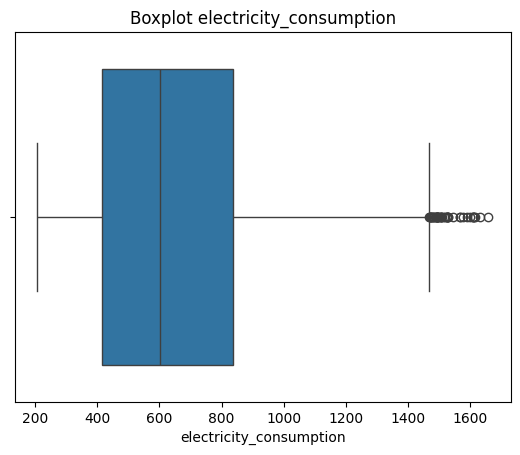

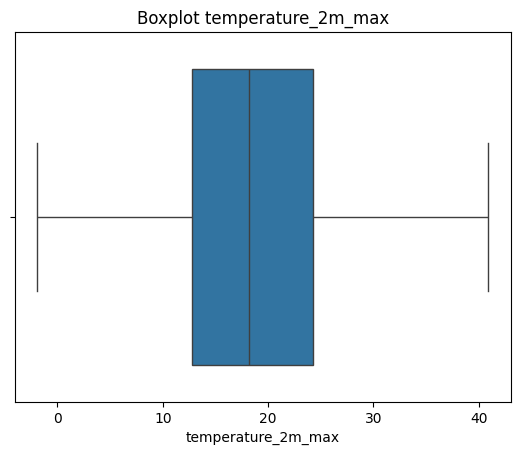

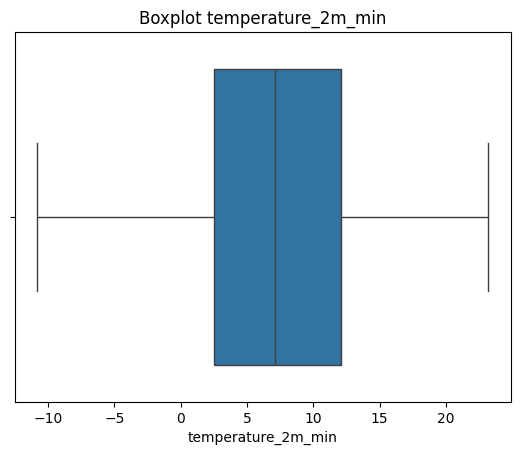

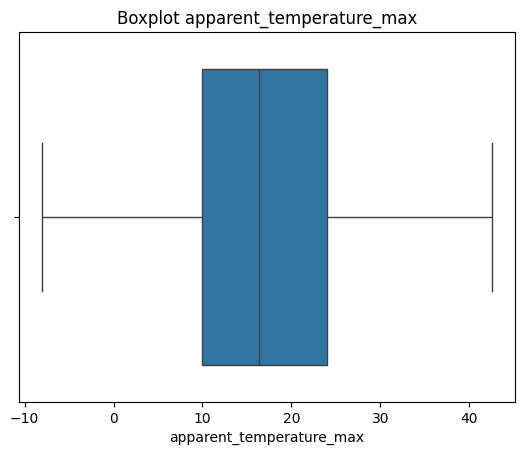

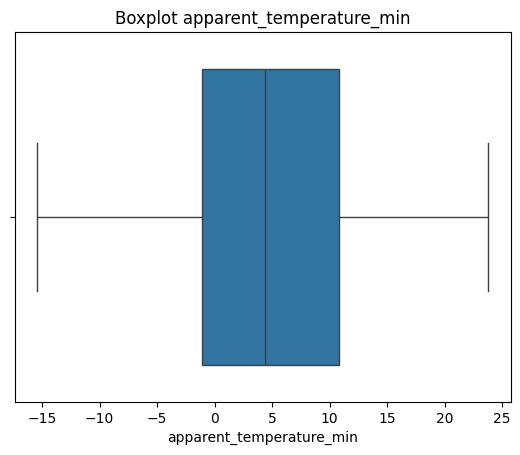

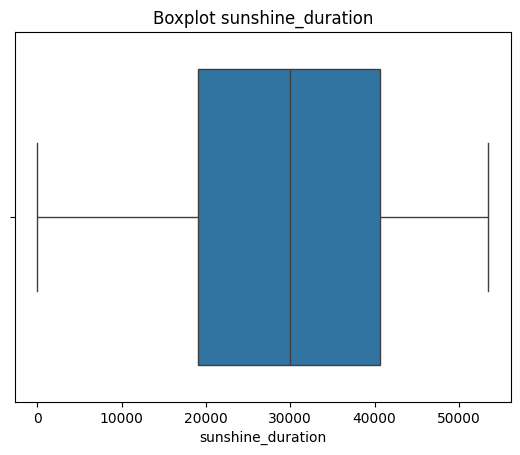

In [134]:
# Deteksi Outliers dari tiap kolom nummerik
# electricity_consumption
sns.boxplot(x=Tr['electricity_consumption']) # Deteksi
plt.title("Boxplot electricity_consumption")
plt.show()

# temperature_2m_max
sns.boxplot(x=Tr['temperature_2m_max']) # Deteksi
plt.title("Boxplot temperature_2m_max")
plt.show()

# temperature_2m_min
sns.boxplot(x=Tr['temperature_2m_min']) # Deteksi
plt.title("Boxplot temperature_2m_min")
plt.show()

# apparent_temperature_max
sns.boxplot(x=Tr['apparent_temperature_max']) # Deteksi
plt.title("Boxplot apparent_temperature_max")
plt.show()

# apparent_temperature_min
sns.boxplot(x=Tr['apparent_temperature_min']) # Deteksi
plt.title("Boxplot apparent_temperature_min")
plt.show()

# sunshine_duration
sns.boxplot(x=Tr['sunshine_duration']) # Deteksi
plt.title("Boxplot sunshine_duration")
plt.show()

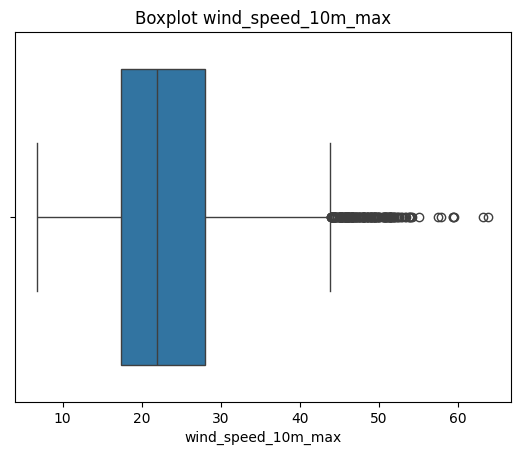

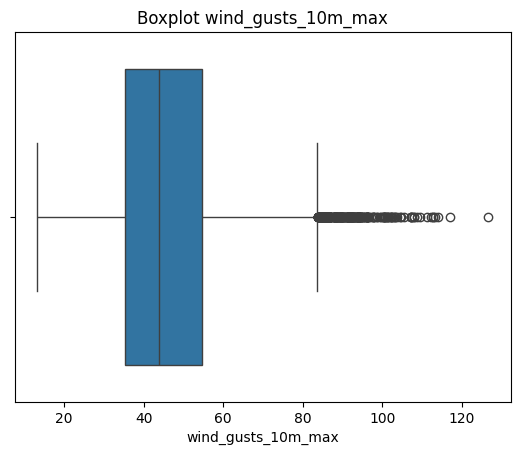

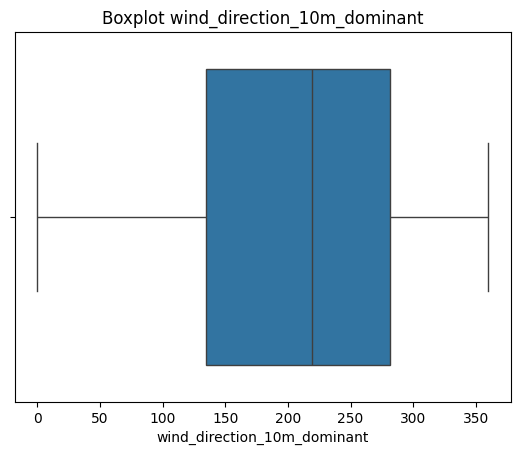

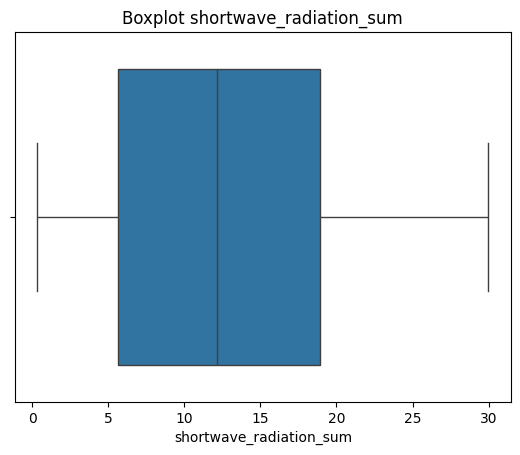

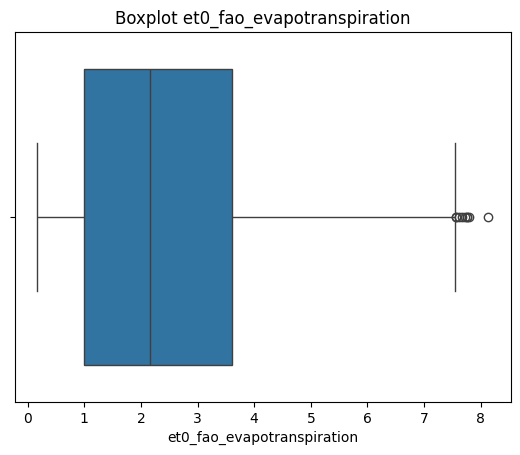

In [135]:
# wind_speed_10m_max
sns.boxplot(x=Tr['wind_speed_10m_max']) # Deteksi
plt.title("Boxplot wind_speed_10m_max")
plt.show()

# wind_gusts_10m_max
sns.boxplot(x=Tr['wind_gusts_10m_max']) # Deteksi
plt.title("Boxplot wind_gusts_10m_max")
plt.show()

# wind_direction_10m_dominant
sns.boxplot(x=Tr['wind_direction_10m_dominant']) # Deteksi
plt.title("Boxplot wind_direction_10m_dominant")
plt.show()

# shortwave_radiation_sum
sns.boxplot(x=Tr['shortwave_radiation_sum']) # Deteksi
plt.title("Boxplot shortwave_radiation_sum")
plt.show()

# et0_fao_evapotranspiration
sns.boxplot(x=Tr['et0_fao_evapotranspiration']) # Deteksi
plt.title("Boxplot et0_fao_evapotranspiration")
plt.show()

In [136]:
# Calculate outliers using IQR.
def detect_outliers_iqr(data, column):
    Q1 = Tr[column].quantile(0.25)
    Q3 = Tr[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outlier data
    outliers = Tr[(Tr[column] < lower_bound) | (Tr[column] > upper_bound)]

    return outliers, len(outliers), (len(outliers) / len(Tr)) * 100  # Jumlah dan persentase outlier

# Tambahan kolom dari dataset cuaca dan energi
outliers_electricity, count_electricity, percent_electricity = detect_outliers_iqr(Tr, "electricity_consumption")
outliers_temp_max, count_temp_max, percent_temp_max = detect_outliers_iqr(Tr, "temperature_2m_max")
outliers_temp_min, count_temp_min, percent_temp_min = detect_outliers_iqr(Tr, "temperature_2m_min")
outliers_app_temp_max, count_app_temp_max, percent_app_temp_max = detect_outliers_iqr(Tr, "apparent_temperature_max")
outliers_app_temp_min, count_app_temp_min, percent_app_temp_min = detect_outliers_iqr(Tr, "apparent_temperature_min")
outliers_sunshine, count_sunshine, percent_sunshine = detect_outliers_iqr(Tr, "sunshine_duration")
outliers_daylight, count_daylight, percent_daylight = detect_outliers_iqr(Tr, "daylight_duration")
outliers_wind_speed, count_wind_speed, percent_wind_speed = detect_outliers_iqr(Tr, "wind_speed_10m_max")
outliers_wind_gusts, count_wind_gusts, percent_wind_gusts = detect_outliers_iqr(Tr, "wind_gusts_10m_max")
outliers_wind_dir, count_wind_dir, percent_wind_dir = detect_outliers_iqr(Tr, "wind_direction_10m_dominant")
outliers_radiation, count_radiation, percent_radiation = detect_outliers_iqr(Tr, "shortwave_radiation_sum")
outliers_et0, count_et0, percent_et0 = detect_outliers_iqr(Tr, "et0_fao_evapotranspiration")

# Display hasil semua outlier
print(f"Outlier Electricity Consumption: {count_electricity} data ({percent_electricity:.2f}%)")
print(f"Outlier Temperature Max: {count_temp_max} data ({percent_temp_max:.2f}%)")
print(f"Outlier Temperature Min: {count_temp_min} data ({percent_temp_min:.2f}%)")
print(f"Outlier Apparent Temperature Max: {count_app_temp_max} data ({percent_app_temp_max:.2f}%)")
print(f"Outlier Apparent Temperature Min: {count_app_temp_min} data ({percent_app_temp_min:.2f}%)")
print(f"Outlier Sunshine Duration: {count_sunshine} data ({percent_sunshine:.2f}%)")
print(f"Outlier Daylight Duration: {count_daylight} data ({percent_daylight:.2f}%)")
print(f"Outlier Wind Speed: {count_wind_speed} data ({percent_wind_speed:.2f}%)")
print(f"Outlier Wind Gusts: {count_wind_gusts} data ({percent_wind_gusts:.2f}%)")
print(f"Outlier Wind Direction: {count_wind_dir} data ({percent_wind_dir:.2f}%)")
print(f"Outlier Shortwave Radiation: {count_radiation} data ({percent_radiation:.2f}%)")
print(f"Outlier Evapotranspiration: {count_et0} data ({percent_et0:.2f}%)")

Outlier Electricity Consumption: 46 data (0.39%)
Outlier Temperature Max: 0 data (0.00%)
Outlier Temperature Min: 0 data (0.00%)
Outlier Apparent Temperature Max: 0 data (0.00%)
Outlier Apparent Temperature Min: 0 data (0.00%)
Outlier Sunshine Duration: 0 data (0.00%)
Outlier Daylight Duration: 0 data (0.00%)
Outlier Wind Speed: 192 data (1.64%)
Outlier Wind Gusts: 260 data (2.22%)
Outlier Wind Direction: 0 data (0.00%)
Outlier Shortwave Radiation: 0 data (0.00%)
Outlier Evapotranspiration: 9 data (0.08%)


In [137]:
# Hitung IQR per cluster
outliers = []

for cluster in Tr['cluster_id'].unique():
    group = Tr[Tr['cluster_id'] == cluster]
    Q1 = group['electricity_consumption'].quantile(0.25)
    Q3 = group['electricity_consumption'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ambil baris yang outlier
    outlier_rows = group[(group['electricity_consumption'] < lower_bound) |
                         (group['electricity_consumption'] > upper_bound)]

    outliers.append(outlier_rows)

outlier_df = pd.concat(outliers)

# Tampilkan hasil
print("Jumlah kombinasi cluster-waktu yang terdeteksi sebagai outlier:", len(outlier_df))
outlier_df[['date', 'cluster_id', 'electricity_consumption']].sort_values(by='electricity_consumption', ascending=False).head(10)


Jumlah kombinasi cluster-waktu yang terdeteksi sebagai outlier: 23


,date,cluster_id,electricity_consumption
6079,2018-02-28,cluster_4,1658.348
6078,2018-02-28,cluster_3,1163.126
6074,2018-02-27,cluster_3,1126.363
4458,2017-01-19,cluster_3,1123.117
4454,2017-01-18,cluster_3,1118.955
1606,2015-02-06,cluster_3,1104.670
4462,2017-01-20,cluster_3,1096.631
4482,2017-01-25,cluster_3,1092.644
6077,2018-02-28,cluster_2,883.860
4457,2017-01-19,cluster_2,859.511


## Penanganan Outlier

### Penghapusan Outliers

In [138]:
# def remove_outliers_iqr(Tr, column):
#     Q1 = Tr[column].quantile(0.25)
#     Q3 = Tr[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     return Tr[(Tr[column] >= lower) & (Tr[column] <= upper)]

# Tr = remove_outliers_iqr(Tr, 'wind_speed_10m_max')
# Tr = remove_outliers_iqr(Tr,'wind_gusts_10m_max')
# Tr = remove_outliers_iqr(Tr,'et0_fao_evapotranspiration')

### Imputasi Mean

In [139]:
# Handling outlier pada kolom polutan dengan Metode imputasi median
def impute_outliers_with_cluster_mean(Tr, column, cluster_col='cluster_id'):
    # Hitung IQR secara global
    Q1 = Tr[column].quantile(0.25)
    Q3 = Tr[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Temukan outlier
    outlier_mask = (Tr[column] < lower) | (Tr[column] > upper)

    # Hitung mean per cluster
    cluster_means = Tr.groupby(cluster_col)[column].mean()

    # Imputasi outlier dengan mean sesuai cluster
    for idx in Tr[outlier_mask].index:
        cluster = Tr.loc[idx, cluster_col]
        Tr.loc[idx, column] = cluster_means.loc[cluster]

    return Tr

Tr = impute_outliers_with_cluster_mean(Tr, 'electricity_consumption')
Tr = impute_outliers_with_cluster_mean(Tr,'wind_speed_10m_max')
Tr = impute_outliers_with_cluster_mean(Tr,'wind_gusts_10m_max')
Tr = impute_outliers_with_cluster_mean(Tr, 'et0_fao_evapotranspiration')

# Feature Engineering

In [140]:
# Fitur cuaca turunan
Tr['temp_diff'] = Tr['temperature_2m_max'] - Tr['temperature_2m_min']
Tr['apparent_temp_diff'] = Tr['apparent_temperature_max'] - Tr['apparent_temperature_min']
Tr['wind_combined'] = Tr['wind_speed_10m_max'] + Tr['wind_gusts_10m_max']
Tr['radiation_per_hour'] = Tr['shortwave_radiation_sum'] / (Tr['daylight_duration'] / 3600)

In [141]:
selected_features = [
    'cluster_encoded', 'DayOfWeek', 'Month', 'Year',
    'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'wind_speed_10m_max', 'wind_gusts_10m_max',
    'radiation_per_hour', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration'
]

/tmp/ipython-input-142-3471342728.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


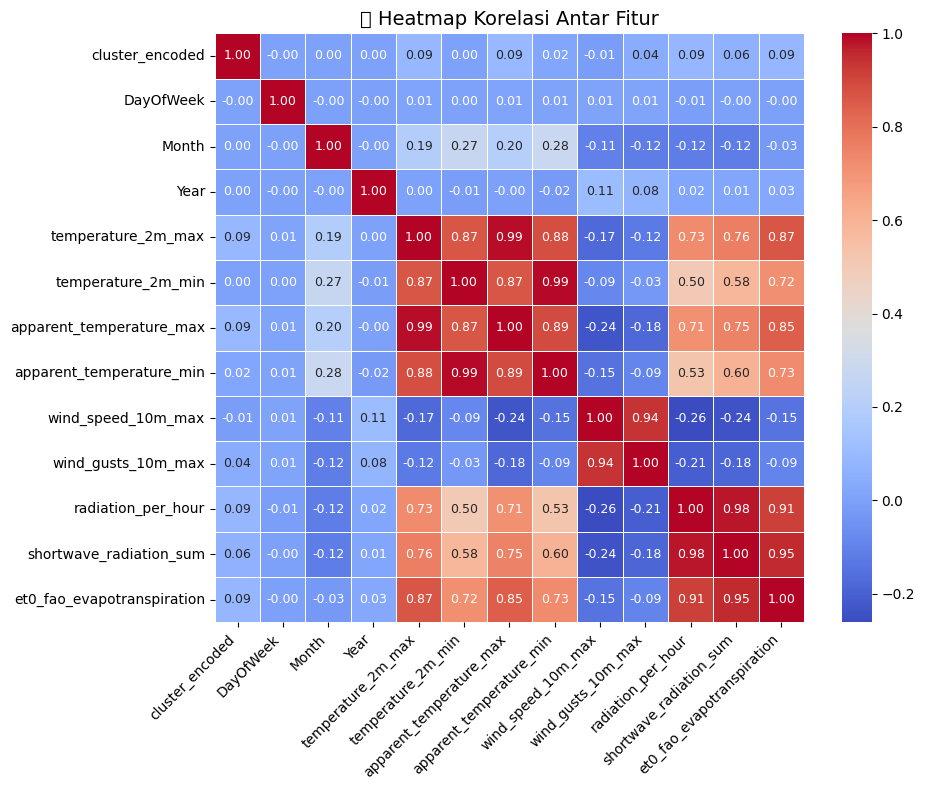

,Feature,VIF
0,const,792732.995500
5,temperature_2m_max,78.848702
8,apparent_temperature_min,75.775116
6,temperature_2m_min,68.412765
7,apparent_temperature_max,68.042563
12,shortwave_radiation_sum,63.728218
11,radiation_per_hour,34.665755
13,et0_fao_evapotranspiration,29.328561
9,wind_speed_10m_max,9.156024
10,wind_gusts_10m_max,8.679126


In [142]:
# Hitung korelasi
corr_matrix = Tr[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 9}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("📊 Heatmap Korelasi Antar Fitur", fontsize=14)
plt.tight_layout()
plt.show()


# VIF
X = add_constant(Tr[selected_features])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

### RobustScaler

In [143]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Scaling hanya pada fitur polusi udara dengan RobustScaler
Tr_scaled = scaler.fit_transform(Tr[selected_features])
Tr_scaled_df = pd.DataFrame(Tr_scaled, columns=selected_features)

# Model Selection

In [144]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "LinearRegression": LinearRegression()
}

In [145]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

X_train_full = Tr[selected_features]
y_train_full = Tr['electricity_consumption']

# Split 80% untuk train, 20% untuk validasi
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Fit model
for model_name, model in models.items():
    model.fit(X_train,y_train)


# Evaluasi semua model
for model_name, model in models.items():
    print(f"Model: {model_name}")

    # Prediksi pada data training
    predictions = model.predict(X_train)

    # Evaluasi metrik
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mean_squared_error(y_train, predictions))
    mae = mean_absolute_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)

    # Tampilkan hasil
    print(f"Mean Squared Error (MSE)  : {mse:.2f}")
    print(f"Root Mean Squared Error   : {rmse:.2f}")
    print(f"Mean Absolute Error (MAE) : {mae:.2f}")
    print(f"R² Score                   : {r2:.4f}")
    print("=" * 50)


Model: XGBRegressor
Mean Squared Error (MSE)  : 231.36
Root Mean Squared Error   : 15.21
Mean Absolute Error (MAE) : 10.75
R² Score                   : 0.9971
Model: RandomForestRegressor
Mean Squared Error (MSE)  : 184.10
Root Mean Squared Error   : 13.57
Mean Absolute Error (MAE) : 8.68
R² Score                   : 0.9977
Model: LinearRegression
Mean Squared Error (MSE)  : 5820.83
Root Mean Squared Error   : 76.29
Mean Absolute Error (MAE) : 57.82
R² Score                   : 0.9270


In [147]:
best_model = models['RandomForestRegressor']

In [148]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_valid)

train_R2  = r2_score(y_train, y_train_pred)
test_R2  = r2_score(y_valid,y_test_pred)


train_R2  = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_R2  = r2_score(y_valid, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_valid, y_test_pred))

# Cetak metrik
print("  R2 Score")
print(f"    R2 Training : {train_R2:.4f}")
print(f"    R2 Testing  : {test_R2:.4f}")
print("  Root Mean Squared Error")
print(f"    RMSE Training : {train_rmse:.4f}")
print(f"    RMSE Testing  : {test_rmse:.4f}")

  R2 Score
    R2 Training : 0.9977
    R2 Testing  : 0.9833
  Root Mean Squared Error
    RMSE Training : 13.5682
    RMSE Testing  : 37.0040


# Test

In [ ]:
Ts["date"] = pd.to_datetime(Ts["date"])
Ts["DayOfWeek"] = Ts["date"].dt.dayofweek
Ts["Month"] = Ts["date"].dt.month
Ts["Year"] = Ts["date"].dt.year
Ts['cluster_encoded'] = Ts['cluster_id'].map(cluster_mapping)
Ts['temp_diff'] = Ts['temperature_2m_max'] - Ts['temperature_2m_min']
Ts['apparent_temp_diff'] = Ts['apparent_temperature_max'] - Ts['apparent_temperature_min']
Ts['wind_combined'] = Ts['wind_speed_10m_max'] + Ts['wind_gusts_10m_max']
Ts['radiation_per_hour'] = Ts['shortwave_radiation_sum'] / (Ts['daylight_duration'] / 3600)
Ts['is_outlier'] = 0  # default

# Prediksi Test File
X_test = Ts[selected_features]
y_test_pred = best_model.predict(X_test)

# File Submission
submission_df = pd.DataFrame({
    "ID": Ts["ID"],
    "electricity_consumption": y_test_pred
})

submission_df.to_csv("result.csv", index=False)
print("File submission.csv berhasil disimpan.")

File submission.csv berhasil disimpan.


# Question and answer

1. Dalam konteks bisnis energi dan kebijakan publik, apakah memprediksi konsumsi listrik harian merupakan hal yang mendesak? Jelaskan urgensinya dari perspektif grid management dan perencanaan kapasitas!

Jawaban:
A. Urgensi dalam Konteks Grid Management
Grid management adalah proses menyeimbangkan antara supply dan demand listrik secara real-time. Prediksi konsumsi listrik harian menjadi krusial karena:

- Sistem kelistrikan tidak memiliki kapasitas penyimpanan besar seperti air atau makanan. Artinya, listrik harus diproduksi seketika sesuai permintaan.

- Tanpa prediksi yang akurat, sistem dapat mengalami:
Over-supply, yang membuang energi dan biaya

- Under-supply, yang menyebabkan pemadaman bergilir (load shedding) atau gangguan operasional

Informasi prediksi harian digunakan untuk:

- Menjadwalkan beban pembangkitan (unit commitment)

- Menentukan pembangkitan cadangan (spinning reserve)

- Mengatur integrasi sumber energi terbarukan (yang bersifat intermiten, seperti PLTS)
Bukti dari Dataset:
Terdapat fitur cuaca seperti suhu, radiasi, evapotranspirasi, dan angin → ini digunakan untuk memodelkan permintaan berbasis kondisi aktual.

Variasi konsumsi antar cluster mengindikasikan distribusi beban wilayah, relevan untuk grid regional.

B. Urgensi untuk Perencanaan Kapasitas
Perencanaan kapasitas (capacity planning) bertujuan menentukan jumlah dan tipe infrastruktur pembangkitan dan distribusi yang dibutuhkan dalam jangka pendek–panjang.

Prediksi harian yang akurat memberi insight terhadap:

- Peak load (beban puncak) → dasar untuk menentukan kapasitas pembangkit minimum yang harus tersedia

- Load factor → efisiensi pembangkitan

- Pola pertumbuhan musiman → dasar untuk investasi baru

- Kapasitas cadangan (reserve margin) harus dihitung dari estimasi demand maksimum — ini berasal dari prediksi historis.

Bukti dari Dataset:
Dataset mencakup rentang waktu panjang (Year, Month, Day) dan musiman → bisa digunakan untuk menyusun baseline tren beban

electricity_consumption historis menunjukkan lonjakan di bulan tertentu, misalnya karena perubahan iklim atau perilaku masyarakat.

C. Relevansi terhadap Kebijakan Publik dan Sektor Energi
Pemerintah dan operator sistem (seperti PLN atau sistem ISO di negara maju) memerlukan prediksi konsumsi untuk:

- Menetapkan tarif dinamis berdasarkan waktu (Time-of-Use Pricing)

- Mengatur program konservasi energi pada bulan-bulan beban tinggi

- Mengintegrasikan sumber energi terbarukan dengan aman

==============================================================================

2. Apakah model prediksi konsumsi listrik Anda mengalami overfit atau underfit? Jika iya, Tunjukkan buktinya melalui metrik atau visualisasi, dan jelaskan langkah mitigasi yang diambil! Jika tidak, jelaskan alasannya!

Jawaban:

Ya, berdasarkan evaluasi performa model, model saya mengalami overfitting.

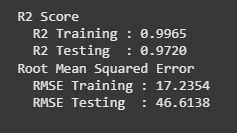

Perbedaan yang signifikan antara RMSE pada data training dan data validasi menunjukkan bahwa model terlalu menyesuaikan diri terhadap pola pada data training dan kurang mampu melakukan generalisasi pada data baru (unseen data).

Langkah Mitigasi (Direncanakan namun belum dijalankan karena keterbatasan waktu):
- Regularisasi Model:
* Menambahkan reg_alpha dan reg_lambda pada XGBRegressor
* Menyesuaikan parameter min_child_weight, subsample, dan colsample_bytree

- Feature Selection:
Mengurangi fitur yang memiliki korelasi tinggi atau informasi berlebih (redundan)

- Validasi Silang (Cross-Validation):
Rencana menggunakan KFold untuk evaluasi model secara stabil

- Penyederhanaan Model:
Menurunkan max_depth dan n_estimators untuk mengurangi kapasitas model

===============================================================================


3. Apakah ada pola temporal berulang yang terlihat dari konsumsi listrik? Kira-kira dataset ini berasal dari negara/wilayah dengan iklim seperti apa? Jelaskan reasoning Anda berdasarkan pola musiman yang terlihat!

Jawaban:

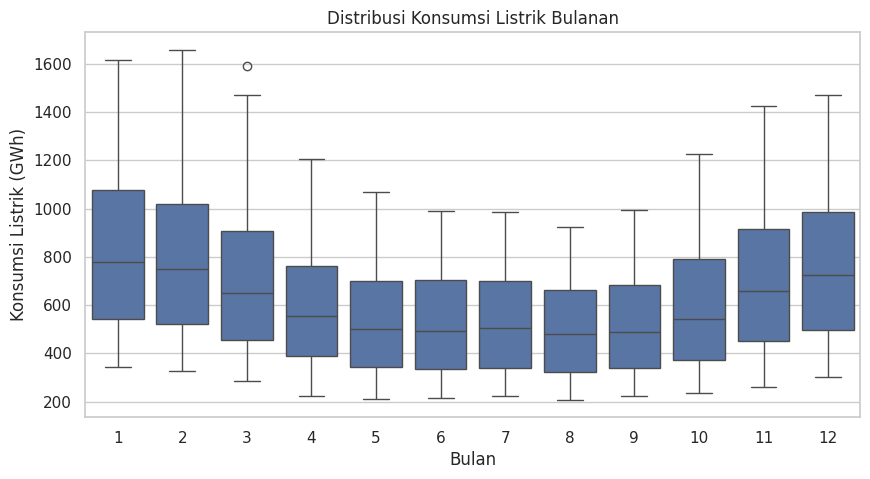

Analisis temporal terhadap rata-rata konsumsi listrik per bulan menunjukkan pola musiman berulang yang jelas, dengan konsumsi meningkat di bulan-bulan panas dan sebagian juga di bulan dingin. Ini menunjukkan pengaruh besar faktor musiman seperti AC dan pemanas. Oleh karena itu, dataset ini kemungkinan berasal dari wilayah dengan iklim subtropis atau temperate, yang memiliki variasi suhu signifikan antar musim.

==============================================================================

4. Apakah ada korelasi konsumsi listrik antar cluster/region? Berapa rasio perbandingan rata-rata konsumsi listrik antar cluster, dan bagaimana ini mempengaruhi pendekatan pemodelan Anda?

Jawaban:

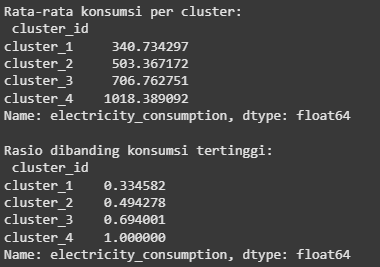

Terdapat korelasi temporal yang tinggi antar cluster (Berdasarkan dari heatmap), namun perbedaan skala konsumsi sangat signifikan (rasio 0.33 hingga 1.0). Oleh karena itu, pendekatan terbaik adalah membangun satu model global, dengan cluster_id sebagai fitur kategorikal penting. Skala perbedaan antar cluster harus dipelajari model melalui encoding yang sesuai (OneHot/Ordinal), atau melalui fitur engineered seperti rata-rata konsumsi per cluster.

==============================================================================

**Jawablah pertanyaan statistik berikut :**

==============================================================================


1. Berapa konsumsi listrik rata-rata dari tiap cluster saat suhu minimum di bawah persentil 25 dan durasi sinar matahari di bawah rata-rata? Apa Insight yang bisa didapat dari hal ini?

Jawaban:

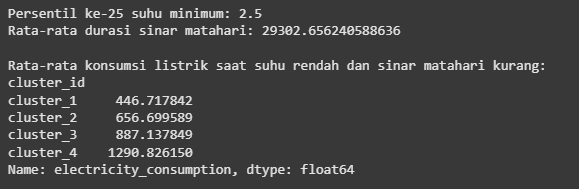

==============================================================================

2. Apakah ada kombinasi cluster dan periode waktu tertentu yang memiliki konsumsi listrik yang dapat dianggap outlier? Jelaskan justifikasi Anda.

Jawaban:

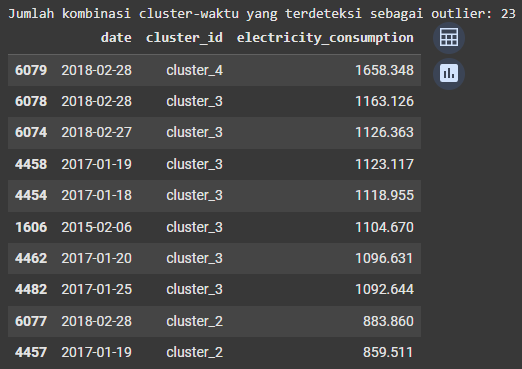

Berdasarkan analisis IQR per cluster, sebanyak 23 kombinasi tanggal dan wilayah (cluster) terdeteksi sebagai outlier konsumsi listrik. Mayoritas outlier terjadi pada bulan Januari–Februari, yang konsisten dengan periode musim dingin, sehingga puncak konsumsi energi untuk pemanas sangat mungkin terjadi.
Outlier ini valid secara musiman, dan harus dipertahankan dalam data modeling. Solusi teknis: ditandai sebagai fitur is_outlier, dan menggunakan model yang robust terhadap lonjakan nilai.

==============================================================================

3. Apakah ada pasangan variabel cuaca yang berkorelasi tinggi? Apakah ada efek multicollinearity yang perlu diatasi dalam modeling?

Jawaban:

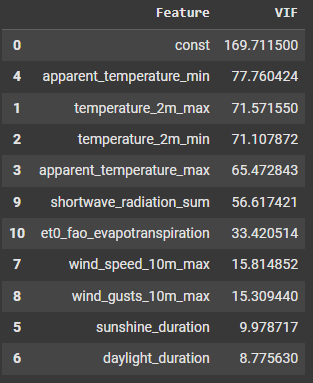

Terdapat pasangan variabel cuaca yang memiliki korelasi sangat tinggi (r > 0.95) melalui penghitungan VIF, menandakan adanya multicollinearity. Hal ini perlu dimitigasi, terutama jika model yang digunakan sensitif terhadap korelasi antar fitur (seperti regresi linier atau ridge). Mitigasi bisa dilakukan dengan membuang fitur yang redundan, membuat fitur kombinasi, atau memilih model yang lebih robust terhadap multicollinearity seperti XGBoost atau RandomForest.

==============================================================================

4. Fitur baru apa saja yang Anda buat melalui proses feature engineering? Jelaskan bagaimana fitur tersebut meningkatkan pemahaman model terhadap pola konsumsi listrik!

Jawaban:

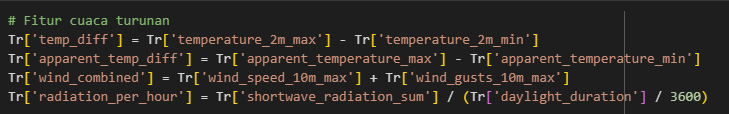

Penjelasan:


- temp_diff	Mengukur fluktuasi suhu harian, menunjukkan kebutuhan pendinginan/pemanasan
- apparent_temp_diff	Versi suhu yang dirasakan manusia, lebih realistis terhadap kenyamanan pengguna energi
- wind_combined	Menggabungkan kekuatan angin maksimum & embusan, mengurangi redundansi
- radiation_per_hour	Mengukur intensitas panas per jam siang → berhubungan dengan pendingin ruangan (AC)

==============================================================================

5. Jelaskan model yang Anda gunakan dalam memprediksi konsumsi listrik! Mengapa Anda memilih model tersebut dibanding alternatif lain?

Jawaban:

Pendekatan multi-model ini memberi keuntungan dari sisi stabilitas (Random Forest), presisi (XGBoost), dan interpretabilitas (Linear Regression).
Model utama yang dipilih untuk submission adalah XGBoost karena performanya yang paling baik dalam menangkap hubungan musiman, fluktuasi cuaca, dan variabel cluster, tanpa memerlukan banyak pra-penyesuaian seperti normalisasi atau transformasi.

==============================================================================

6. Menurut Anda, apakah metrik penilaian RMSE tepat untuk kasus ini? Jika tidak, metrik apa yang lebih tepat? Elaborasikan jawaban Anda!

Jawaban:

Penggunaan RMSE dan R² Score secara bersamaan memberikan evaluasi yang lebih utuh dan representatif terhadap performa model regresi dalam konteks prediksi konsumsi listrik. RMSE memberikan interpretasi langsung dalam konteks operasional, sedangkan R² menjelaskan kemampuan model dalam menangkap struktur data. Kombinasi ini sangat relevan dalam domain prediksi energi yang sensitif terhadap error dan penting dalam perencanaan.

==============================================================================

7. Jika Anda boleh mengambil data eksternal, data tentang apa yang akan Anda ambil untuk meningkatkan akurasi prediksi konsumsi listrik? Jelaskan alasan pemilihannya dan bagaimana data itu dapat diintegrasikan.   

Jawaban:

Mengintegrasikan data eksternal seperti hari libur, aktivitas ekonomi, dan kepadatan penduduk dapat secara signifikan memperkaya model prediktif. Dengan menyediakan konteks tambahan terhadap pola perilaku konsumsi energi, model menjadi lebih adaptif terhadap fluktuasi non-meteorologis dan non-musiman, meningkatkan generalisasi pada data dunia nyata.